# Basic Quantum Theory, Observables and Measurements

### Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [106]:
import numpy as np

def observable_probability(array = [], position = 0):
    is_in_array = False
    amplitude = 0
    for elements in array:
        amplitude += np.abs(elements) ** 2
        if elements == position:
            is_in_array = True
    if is_in_array:
        return (np.abs(position) ** 2) / amplitude
    return None

def transition(first_array=[], second_array=[]):
    first_array_normalized = np.array(normalize(first_array))
    second_array_normalized = np.array(normalize(second_array))
    bra = first_array_normalized.T.conj()
    inner_product = np.dot(bra, second_array_normalized)
    return np.abs(inner_product) ** 2

def normalize(array=[]):
    norm = np.linalg.norm(array) 
    return array / norm

def programming_drill(): #Programming Drill 4.1.1 from the book Quantum Computing for Computer Scientists
    psi = np.array([complex(-3,-1), complex(0, -2), complex(0, -1), 2])
    x_2 = complex(0, -1)
    print(f"The probability that the particle can be found at position x2 in the following array {psi} is: {observable_probability(psi, x_2)}")
    phi = np.array([complex(1, 1), complex(0, 1), complex(2, 4), complex(-1, 3)])
    print(f"Lets say that the vector {psi} needs to transition to the vector {phi}, the probability of transitioning is: {transition(psi, phi)}")

programming_drill()

The probability that the particle can be found at position x2 in the following array [-3.-1.j  0.-2.j  0.-1.j  2.+0.j] is: 0.05263157894736842
Lets say that the vector [-3.-1.j  0.-2.j  0.-1.j  2.+0.j] needs to transition to the vector [ 1.+1.j  0.+1.j  2.+4.j -1.+3.j], the probability of transitioning is: 0.28708133971291866


### Complete los retos de programación del capítulo 4.

1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [105]:
import numpy as np

def transition_amplitude(first_array=[], second_array=[]):
    first_array_normalized = np.array(normalize(first_array))
    second_array_normalized = np.array(normalize(second_array))
    bra = first_array_normalized.T.conj()
    inner_product = np.dot(bra, second_array_normalized)
    return inner_product

def normalize(array=[]):
    norm = np.linalg.norm(array) 
    return array / norm

def transition_probability(first_array=[], second_array=[]):
    return np.abs(transition_amplitude(first_array, second_array)) ** 2

def main(): #Example 4.1.6 from the book Quantum Computing for Computer Scientists
    psi = (np.sqrt(2) / 2) * np.array([1, complex(0, 1)])
    phi = (np.sqrt(2) / 2) * np.array([complex(0, 1), -1])
    print(f"The probability of transitioning is: {transition_probability(psi, phi)}")

main()

The probability of transitioning is: 1.0000000000000004


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [104]:
import numpy as np

def hermitian(matrix = []):
    is_hermitian = np.allclose(matrix, np.array(matrix).T.conj())
    return is_hermitian

def expected_value(observable=[], ket=[]):
    expected_value = np.dot(np.dot(observable, ket), np.array(ket).T.conj())
    return expected_value

def variance(observable=[], ket=[]):
    delta_operator = observable - (expected_value(observable, ket) * np.eye(len(observable)))
    variance = np.dot(np.array(ket).T.conj(), np.dot(np.dot(delta_operator, delta_operator), ket))
    return variance

def main(): #Example 4.2.7 from the book Quantum Computing for Computer Scientists
    omega = np.array([[1, complex(0, -1)], [complex(0, 1), 2]])
    ket = np.array([np.sqrt(2)/2, complex(0, np.sqrt(2)/2)])
    if hermitian(omega):
        value = expected_value(omega, ket)
        var = variance(omega, ket)
        print(f"The expected value from omega and ket is: {value}. And the variance is: {var}")

main()

The expected value from omega and ket is: (2.5000000000000004+0j). And the variance is: (0.25+0j)


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [103]:
import numpy as np

def transition_amplitude(first_array=[], second_array=[]):
    first_array_normalized = np.array(normalize(first_array))
    second_array_normalized = np.array(normalize(second_array))
    bra = first_array_normalized.T.conj()
    inner_product = np.dot(bra, second_array_normalized)
    return inner_product

def normalize(array=[]):
    norm = np.linalg.norm(array) 
    return array / norm

def transition_probability(first_array=[], second_array=[]):
    return np.abs(transition_amplitude(first_array, second_array)) ** 2

def hermitian(matrix = []):
    is_hermitian = np.allclose(matrix, np.array(matrix).T.conj())
    return is_hermitian

def observable_eigen_values(observable=[]):
    if hermitian(observable):
        eigen_values, eigen_vectors = np.linalg.eigh(observable)
        return eigen_values, eigen_vectors
    return None, None

def eigen_values_probabilities(eigen_vectors=[], ket=[]):
    probabilities = []
    if eigen_vectors is not None:
        for element in eigen_vectors:
            probabilities.append(transition_probability(element, ket))
    return probabilities

def main(): #Example 4.3.1 from the book Quantum Computing for Computer Scientists
    observable = np.array([[-1, complex(0,-1)],[complex(0,1), 1]])
    ket = (1/2) *  np.array([1, 1])
    eigen_values, eigen_vectors = observable_eigen_values(observable)
    probabilities = eigen_values_probabilities(eigen_vectors, ket)
    print(f"The eigenvalues of the observable are: {eigen_values}. And the probabilities of transitioning from the eigenvectors to the ket state are: {list(map(float, probabilities))}")

main()

The eigenvalues of the observable are: [-1.41421356  1.41421356]. And the probabilities of transitioning from the eigenvectors to the ket state are: [0.8535533905932735, 0.1464466094067262]


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [102]:
def dynamics(unitary_maps=[], ket_phi=[]):
    ket_psi = ket_phi
    for U in unitary_maps:
        ket_psi = np.dot(U, ket_psi)
    return ket_psi

def main(): #Inspired by Exercise 4.2.2 from the book Quantum Computing for Computer Scientists
    ket_phi = np.array([1,0,0,0])
    unitary_map_1 = (1*np.sqrt(2)) * np.array([[0,1,1,0],
                                              [complex(0,1),0,0,1],
                                              [1,0,0,complex(0,1)],
                                              [0,1,-1,0]])
    unitary_map_2 = np.array([[0,1,complex(1,-1),-1],
                             [-1,complex(1,-1),1,0],
                             [1,complex(-1,1),-1,0],
                             [0,-1,complex(-1,1),1]])
    unitary_maps = [unitary_map_1, unitary_map_2]
    final_state = [f"{num.real} + {num.imag}j" if num.imag > 0 else f"{num.real}" if num.imag==0 else f"{num.real} - {-num.imag}j" for num in list(dynamics(unitary_maps, ket_phi))]
    print(f"The final state of the System is: {final_state}")

main()

The final state of the System is: ['1.4142135623730951', '2.8284271247461903 + 1.4142135623730951j', '-2.8284271247461903 - 1.4142135623730951j', '-1.4142135623730951']


### Realice los siguientes problemas e incluyalos como ejemplos
Modele en su librería los problemas

4.3.1. Find all the possible states the system described in Exercise 4.2.2
can transition into after a measurement has been carried out.

In [101]:
import numpy as np

def transition_amplitude(first_array=[], second_array=[]):
    first_array_normalized = np.array(normalize(first_array))
    second_array_normalized = np.array(normalize(second_array))
    bra = first_array_normalized.T.conj()
    inner_product = np.dot(bra, second_array_normalized)
    return inner_product

def normalize(array=[]):
    norm = np.linalg.norm(array) 
    return array / norm

def transition_probability(first_array=[], second_array=[]):
    return np.abs(transition_amplitude(first_array, second_array)) ** 2

def hermitian(matrix = []):
    is_hermitian = np.allclose(matrix, np.array(matrix).T.conj())
    return is_hermitian

def observable_eigen_values(observable=[]):
    if hermitian(observable):
        eigen_values, eigen_vectors = np.linalg.eigh(observable)
        return eigen_values, eigen_vectors
    return None, None

def main():
    spin_up = np.array([1,0])
    Sx = np.array([[0,1],
                   [1,0]])
    initial_particle = spin_up
    initial_particle = np.dot(Sx, initial_particle)
    eigen_values, eigen_vectors = observable_eigen_values(Sx)
    probabilities = []
    for element in eigen_vectors:
        probabilities.append(transition_probability(initial_particle, element))
    probabilities = list(map(float, probabilities))
    for i in range(len(eigen_vectors)):
        print(f"The probability of going from {initial_particle} to {eigen_vectors[i]} i: {probabilities[i]}")
    
main()

The probability of going from [0 1] to [-0.70710678  0.70710678] i: 0.5000000000000001
The probability of going from [0 1] to [0.70710678 0.70710678] i: 0.5000000000000001


4.3.2 Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.

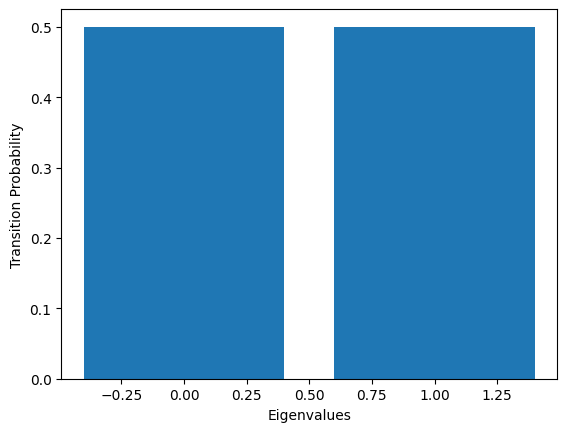

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def transition_amplitude(first_array=[], second_array=[]):
    first_array_normalized = np.array(normalize(first_array))
    second_array_normalized = np.array(normalize(second_array))
    bra = first_array_normalized.T.conj()
    inner_product = np.dot(bra, second_array_normalized)
    return inner_product

def normalize(array=[]):
    norm = np.linalg.norm(array) 
    return array / norm

def transition_probability(first_array=[], second_array=[]):
    return np.abs(transition_amplitude(first_array, second_array)) ** 2

def hermitian(matrix = []):
    is_hermitian = np.allclose(matrix, np.array(matrix).T.conj())
    return is_hermitian

def observable_eigen_values(observable=[]):
    if hermitian(observable):
        eigen_values, eigen_vectors = np.linalg.eigh(observable)
        return eigen_values, eigen_vectors
    return None, None

def plot(eigen_values=[], probabilities=[]):
    plt.bar(range(len(eigen_values)), probabilities)
    plt.xlabel("Eigenvalues")
    plt.ylabel("Transition Probability")
    plt.show()

def main():
    spin_up = np.array([1,0])
    Sx = np.array([[0,1],
                   [1,0]])
    initial_particle = spin_up
    initial_particle = np.dot(Sx, initial_particle)
    eigen_values, eigen_vectors = observable_eigen_values(Sx)
    probabilities = []
    for element in eigen_vectors:
        probabilities.append(transition_probability(initial_particle, element))
    probabilities = list(map(float, probabilities))
    plot(eigen_values, probabilities)
    
main()

4.4.1. Verify that
$$ U_1 =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} \quad \text{and} \quad
U_2 =
\begin{pmatrix}
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2}
\end{pmatrix} $$
are unitary matrices. Multiply them and verify that their product is also unitary.



In [124]:
import numpy as np

def unitary(matrix=[]):
    is_unitary = np.allclose(np.dot(np.array(matrix).T.conj(), np.array(matrix)), np.eye(matrix.shape[0]))
    return is_unitary

def main():
    U1 = np.array([[0, 1],
                   [1, 0]])
    U2 = (np.sqrt(2)/2) * np.array([[1, 1],
                                    [1, -1]])
    multiplication = np.dot(U1, U2)
    matrices=[U1,U2,multiplication]
    for element in matrices:
        formatted_matrix = '[' + ', '.join([f'[{", ".join(map(str, row))}]' for row in element]) + ']'
        if unitary(element):
            print(f"{formatted_matrix} is unitary.")
        else:
            print(f"{formatted_matrix} is not unitary.")

main()

[[0, 1], [1, 0]] is unitary.
[[0.7071067811865476, 0.7071067811865476], [0.7071067811865476, -0.7071067811865476]] is unitary.
[[0.7071067811865476, -0.7071067811865476], [0.7071067811865476, 0.7071067811865476]] is unitary.


4.4.2. Go back to Example 3.3.2 (quantum billiard ball), keep the same
initial state vector [1, 0, 0, 0]T, but change the unitary map to
\begin{pmatrix}
0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0\\
\frac{i}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}}\\
\frac{1}{\sqrt{2}} & 0 & 0 & \frac{i}{\sqrt{2}}\\
0 & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} & 0
\end{pmatrix}

Determine the state of the system after three time steps. What is the chance of
the quantum ball to be found at point 3

In [128]:
import numpy as np

def ket_phi(array=[]):
    ket_phi = 0
    for element in array:
        ket_phi += np.abs(element) ** 2
    return ket_phi

def normalize(array=[]):
    norm = np.linalg.norm(array) 
    return array / norm

def position_probability(array=[], position=0):
    return (np.abs(array[position]) ** 2) / ket_phi(array)

def main():
    A = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0], 
                [complex(0, 1)/np.sqrt(2), 0, 0, 1/np.sqrt(2)], 
                [1/np.sqrt(2), 0, 0, complex(0, 1)/np.sqrt(2)],
                [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]])
    initial_state = np.array([1, 0, 0, 0])
    click = np.dot(A, initial_state)
    click = np.dot(A, click)
    click = np.dot(A, click)
    probability = position_probability(normalize(click), 2)
    print(f"The probability of finding the quantum ball at point 3 is: {probability}")

main()

The probability of finding the quantum ball at point 3 is: 0.0
